In [0]:
# DON'T MAKE ANY CHANGES IN THIS NOTEBOOK FOR EXPERIMENTING MAKE ANOTHER NOTEBOOK AND DONT SHARE THIS WITH ANYBODY ELSE


from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# HERE directory is path of a folder in google drive where training dataset is stored #
# HERE new_dir is path of a folder in google drive where resized training dataset will be stored #

#url = "http://vis-www.cs.umass.edu/lfw/lfw.tgz"
#filename = "lfw.tgz"
#directory = "imgs"
#new_dir = "new_imgs"
directory = "drive/My Drive/datasets/yellowcurved"
new_dir = "drive/My Drive/leaf_resized"
import urllib
import cv2
import tarfile
import os
import tarfile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.misc import imresize, imsave
import tensorflow as tf
%matplotlib inline

In [0]:
# THIS CODE CELL IS FOR UNZIPPING THE DATASET FILE...HERE WE HAVE ALREADY UNZIPED IT SO ARE NOT USING THIS #

# if not os.path.isdir(directory):
#     if not os.path.isfile(filename):
#         urllib.request.urlretrieve (url, filename)
#     tar = tarfile.open(filename, "r:gz") 
#     tar.extractall(path=directory)
#     tar.close()

In [0]:
# THIS CODE CELL WILL CREATE NEW FOLDER IN DRIVE FOR STORING THE RESIZED IMAGES PURPOSE IF THE FOLDER IS NOT ALREADY CREATED # 

mypath ="drive/My Drive/leaf_resized"
if not os.path.isdir(mypath):
   os.makedirs(mypath)

In [0]:

filepaths = []
for dir_, _, files in os.walk(directory):
    for fileName in files:
        relDir = os.path.relpath(dir_, directory)
        relFile = os.path.join(relDir, fileName)
        filepaths.append(directory + "/" + relFile)
        
for i, fp in enumerate(filepaths):
    img = imread(fp) #/ 255.0
    img = imresize(img, (40, 40))
    imsave(new_dir + "/" + str(i) + ".png", img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()


KeyboardInterrupt: ignored

In [0]:
print(filepaths)
print(len(filepaths))

['drive/My Drive/datasets/yellowcurved/./y3338.jpg', 'drive/My Drive/datasets/yellowcurved/./y3339.jpg', 'drive/My Drive/datasets/yellowcurved/./y3337.jpg', 'drive/My Drive/datasets/yellowcurved/./y334.jpg', 'drive/My Drive/datasets/yellowcurved/./y3342.jpg', 'drive/My Drive/datasets/yellowcurved/./y3346.jpg', 'drive/My Drive/datasets/yellowcurved/./y3341.jpg', 'drive/My Drive/datasets/yellowcurved/./y3340.jpg', 'drive/My Drive/datasets/yellowcurved/./y3345.jpg', 'drive/My Drive/datasets/yellowcurved/./y3348.jpg', 'drive/My Drive/datasets/yellowcurved/./y3347.jpg', 'drive/My Drive/datasets/yellowcurved/./y3343.jpg', 'drive/My Drive/datasets/yellowcurved/./y3344.jpg', 'drive/My Drive/datasets/yellowcurved/./y3349.jpg', 'drive/My Drive/datasets/yellowcurved/./y3352.jpg', 'drive/My Drive/datasets/yellowcurved/./y335.jpg', 'drive/My Drive/datasets/yellowcurved/./y3350.jpg', 'drive/My Drive/datasets/yellowcurved/./y3351.jpg', 'drive/My Drive/datasets/yellowcurved/./y3353.jpg', 'drive/My Dri

In [0]:
filepaths_new = []
for dir_, _, files in os.walk(new_dir):
    for fileName in files:
        if not fileName.endswith(".png"):
            continue
        relDir = os.path.relpath(dir_, directory)
        relFile = os.path.join(relDir, fileName)
        filepaths_new.append(directory + "/" + relFile)

In [0]:
print(filepaths_new)
print(len(filepaths_new))

['drive/My Drive/datasets/yellowcurved/../../leaf_resized/0.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/1.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/2.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/3.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/4.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/5.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/6.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/7.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/8.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/9.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/10.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/11.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/12.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/13.png', 'drive/My Drive/datasets/yellowcurved/../../leaf_resized/14.png', 'drive/My Drive/dat

In [0]:
def next_batch(num=64, data=filepaths_new):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [imread(data[i]) for i in idx]

    shuffled = np.asarray(data_shuffle)
    
    return np.asarray(data_shuffle)

In [0]:
# Code by Parag Mital (https://github.com/pkmital/CADL/)
def montage(images):    
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    if len(images.shape) == 4 and images.shape[3] == 3:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1, 3)) * 0.5
    elif len(images.shape) == 4 and images.shape[3] == 1:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1, 1)) * 0.5
    elif len(images.shape) == 3:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1)) * 0.5
    else:
        raise ValueError('Could not parse image shape of {}'.format(
            images.shape))
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                m[1 + i + i * img_h:1 + i + (i + 1) * img_h,
                  1 + j + j * img_w:1 + j + (j + 1) * img_w] = this_img
    return m

In [0]:
tf.reset_default_graph()
batch_size = 64
n_noise = 64

X_in = tf.placeholder(dtype=tf.float32, shape=[None, 40, 40, 3], name='X')
noise = tf.placeholder(dtype=tf.float32, shape=[None, n_noise])

keep_prob = tf.placeholder(dtype=tf.float32, name='keep_prob')
is_training = tf.placeholder(dtype=tf.bool, name='is_training')

def lrelu(x):
    return tf.maximum(x, tf.multiply(x, 0.2))

def binary_cross_entropy(x, z):
    eps = 1e-12
    return (-(x * tf.log(z + eps) + (1. - x) * tf.log(1. - z + eps)))

def discriminator(img_in, reuse=None, keep_prob=keep_prob):
    activation = lrelu
    with tf.variable_scope("discriminator", reuse=reuse):
        x = tf.reshape(img_in, shape=[-1, 40, 40, 3])
        x = tf.layers.conv2d(x, kernel_size=5, filters=256, strides=2, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, kernel_size=5, filters=128, strides=1, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, kernel_size=5, filters=64, strides=1, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.contrib.layers.flatten(x)
        x = tf.layers.dense(x, units=128, activation=activation)
        x = tf.layers.dense(x, units=1, activation=tf.nn.sigmoid)
        return x
    
def generator(z, keep_prob=keep_prob, is_training=is_training):
    activation = lrelu
    momentum = 0.9
    with tf.variable_scope("generator", reuse=None):
        x = z
        
        d1 = 4#3
        d2 = 3
        
        x = tf.layers.dense(x, units=d1 * d1 * d2, activation=activation)
        x = tf.layers.dropout(x, keep_prob)      
        x = tf.contrib.layers.batch_norm(x, is_training=is_training, decay=momentum)  
        
        x = tf.reshape(x, shape=[-1, d1, d1, d2])
        x = tf.image.resize_images(x, size=[10, 10])
        
        
        
        x = tf.layers.conv2d_transpose(x, kernel_size=5, filters=256, strides=2, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.contrib.layers.batch_norm(x, is_training=is_training, decay=momentum)
        x = tf.layers.conv2d_transpose(x, kernel_size=5, filters=128, strides=2, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.contrib.layers.batch_norm(x, is_training=is_training, decay=momentum)
        x = tf.layers.conv2d_transpose(x, kernel_size=5, filters=64, strides=1, padding='same', activation=activation)
        x = tf.layers.dropout(x, keep_prob)
        x = tf.contrib.layers.batch_norm(x, is_training=is_training, decay=momentum)
        x = tf.layers.conv2d_transpose(x, kernel_size=5, filters=3, strides=1, padding='same', activation=tf.nn.sigmoid)
        return x

In [0]:
g = generator(noise, keep_prob, is_training)
print(g)
d_real = discriminator(X_in)
d_fake = discriminator(g, reuse=True)

vars_g = [var for var in tf.trainable_variables() if var.name.startswith("generator")]
vars_d = [var for var in tf.trainable_variables() if var.name.startswith("discriminator")]


d_reg = tf.contrib.layers.apply_regularization(tf.contrib.layers.l2_regularizer(1e-6), vars_d)
g_reg = tf.contrib.layers.apply_regularization(tf.contrib.layers.l2_regularizer(1e-6), vars_g)

loss_d_real = binary_cross_entropy(tf.ones_like(d_real), d_real)
loss_d_fake = binary_cross_entropy(tf.zeros_like(d_fake), d_fake)
loss_g = tf.reduce_mean(binary_cross_entropy(tf.ones_like(d_fake), d_fake))

loss_d = tf.reduce_mean(0.5 * (loss_d_real + loss_d_fake))

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optimizer_d = tf.train.RMSPropOptimizer(learning_rate=0.0001).minimize(loss_d + d_reg, var_list=vars_d)
    optimizer_g = tf.train.RMSPropOptimizer(learning_rate=0.0002).minimize(loss_g + g_reg, var_list=vars_g)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Tensor("generator/conv2d_transpose_3/Sigmoid:0", shape=(?, 40, 40, 3), dtype=float32)


0 0.6906979 0.69101715


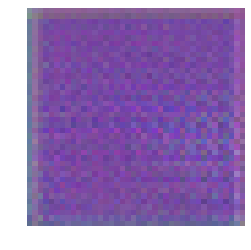

10 0.6891412 0.6969369


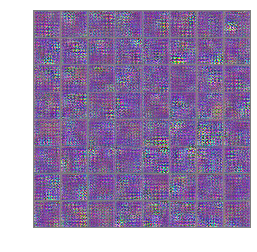

20 0.68838286 0.7015319


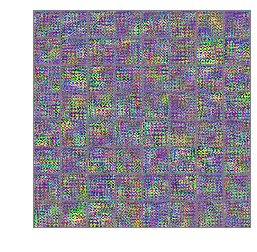

30 0.6857646 0.71150285


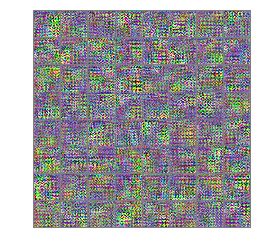

40 0.681787 0.7271807


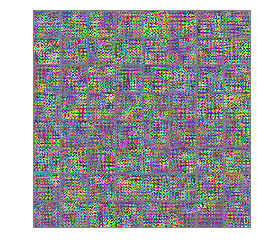

50 0.6744765 0.754333


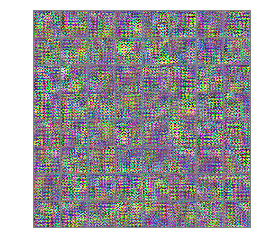

60 0.6632376 0.7975418


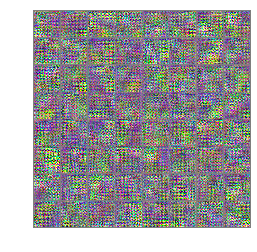

70 0.63804245 0.8708638
not training discriminator


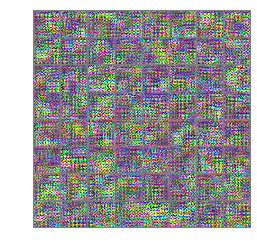

80 0.6421653 0.86932147
not training discriminator


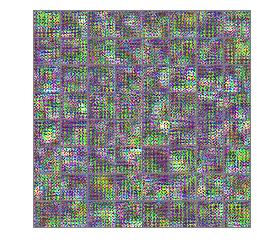

90 0.644465 0.87043893
not training discriminator


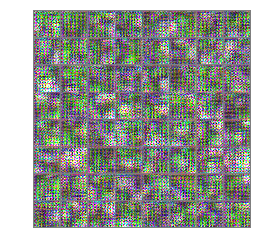

100 0.64539385 0.8555397


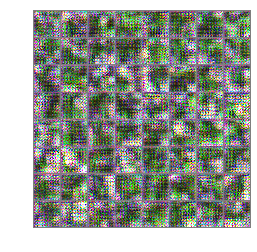

110 0.6591374 0.83862007


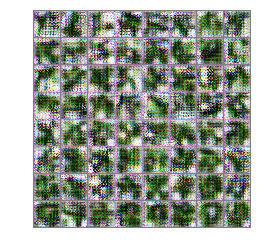

In [0]:
for i in range(60000):
    train_d = True
    train_g = True
    keep_prob_train = 0.6 # 0.5
    
    
    n = np.random.uniform(0.0, 1.0, [batch_size, n_noise]).astype(np.float32)   
    batch = [b for b in next_batch(num=batch_size)]  
    
    d_real_ls, d_fake_ls, g_ls, d_ls = sess.run([loss_d_real, loss_d_fake, loss_g, loss_d], feed_dict={X_in: batch, noise: n, keep_prob: keep_prob_train, is_training:True})
    
    d_fake_ls_init = d_fake_ls
    
    d_real_ls = np.mean(d_real_ls)
    d_fake_ls = np.mean(d_fake_ls)
    g_ls = g_ls
    d_ls = d_ls
        
    if g_ls * 1.35 < d_ls:
        train_g = False
        pass
    if d_ls * 1.35 < g_ls:
        train_d = False
        pass
    
    if train_d:
        sess.run(optimizer_d, feed_dict={noise: n, X_in: batch, keep_prob: keep_prob_train, is_training:True})
        
        
    if train_g:
        sess.run(optimizer_g, feed_dict={noise: n, keep_prob: keep_prob_train, is_training:True})
        
        
    if not i % 10:
        print (i, d_ls, g_ls)
        if not train_g:
            print("not training generator")
        if not train_d:
            print("not training discriminator")
        gen_imgs = sess.run(g, feed_dict = {noise: n, keep_prob: 1.0, is_training:False})
        imgs = [img[:,:,:] for img in gen_imgs]
        fig = plt.figure()
        
        
        if not i%1000:
          m1 = imgs[0] 
#           cv2.waitKey(0)
          plt.axis('off')
          plt.imshow(m1, cmap='gray')
          fig.savefig('drive/My Drive/Leaf_generated5/Gen_Leaf_%d.jpg' % i)
          plt.show()
          plt.close()
        else:
          m = montage(imgs)
#         cv2.waitKey(0)
          #m = imgs[0]
          plt.axis('off')
          plt.imshow(m, cmap='gray')
          fig.savefig('drive/My Drive/Leaf_generated5/Gen_Leaf_%d.jpg' % i)
          plt.show()
          plt.close()
